# Análise de Artistas do IMDB

Este notebook analisa a tabela de artistas do IMDB (`name.basics.tsv.gz`) de forma compacta, mostrando:
- Os artistas com maior quantidade de filmes.
- As profissões mais comuns entre os artistas.
- Os artistas mais velhos, filtrando registros irreais.

Todos os dados foram limpos e processados apenas com a primeira tabela, para facilitar a visualização e evitar travamentos.




C:\Users\anap1\AppData\Local\Temp\ipykernel_18764\1596307204.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_amostra['QuantidadeFilmes'] = tabela_amostra['PrincipaisTitulos'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)


Top 10 artistas com mais filmes:
                  Nome                  ProfissaoPrincipal  QuantidadeFilmes
4999   Terrence Howard               actor,producer,writer                 4
0         Fred Astaire        actor,miscellaneous,producer                 4
1        Lauren Bacall  actress,soundtrack,archive_footage                 4
2      Brigitte Bardot   actress,music_department,producer                 4
3         John Belushi       actor,writer,music_department                 4
4       Ingmar Bergman               writer,director,actor                 4
5       Ingrid Bergman         actress,producer,soundtrack                 4
6      Humphrey Bogart        actor,producer,miscellaneous                 4
4960          Edd Hall  actor,miscellaneous,art_department                 4
4961  LisaGay Hamilton           actress,director,producer                 4

Top 10 profissões mais comuns:
ProfissaoPrincipal
producer             2317
actor                1980
director         

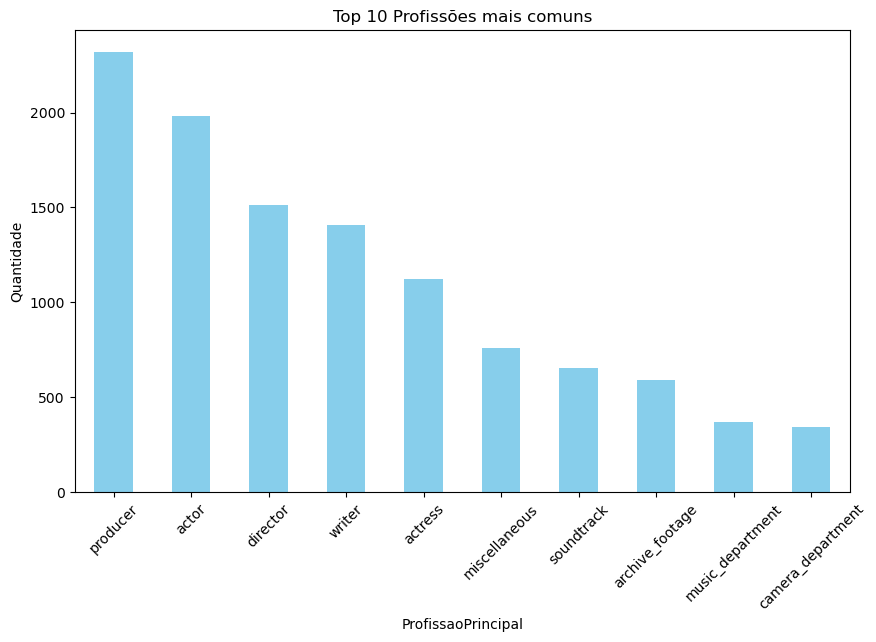


Top 10 artistas mais velhos (ano de nascimento):
                       Nome  AnoNascimento
589         Edgar Allan Poe         1809.0
2040        Charles Dickens         1812.0
3461         Richard Wagner         1813.0
3412       George Grossmith         1847.0
2611         Siegmund Lubin         1851.0
2500  Herbert Beerbohm Tree         1852.0
873           L. Frank Baum         1856.0
3186        Harry Davenport         1866.0
2180          George Arliss         1868.0
3971     Mohandas K. Gandhi         1869.0


'\n# Análise de Artistas do IMDB\n\nEste notebook analisa a tabela de artistas do IMDB (`name.basics.tsv.gz`) de forma compacta, mostrando:\n- Os artistas com maior quantidade de filmes.\n- As profissões mais comuns entre os artistas.\n- Os artistas mais velhos, filtrando registros irreais.\n\nTodos os dados foram limpos e processados apenas com a primeira tabela, para facilitar a visualização e evitar travamentos.\n'

In [ ]:
# ------------------------- Importando bibliotecas -------------------------
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------- Carregando o dataset -------------------------
caminho_arquivo = "C:\\Users\\anap1\\Downloads\\name.basics (1).tsv.gz"
tabela = pd.read_csv(caminho_arquivo, sep='\t', compression='gzip', low_memory=False)

# ------------------------- Renomeando colunas -------------------------
tabela.rename(columns={
    'nconst':'ID',
    'primaryName':'Nome',
    'birthYear':'AnoNascimento',
    'deathYear':'AnoFalecimento',
    'primaryProfession':'ProfissaoPrincipal',
    'knownForTitles':'PrincipaisTitulos'
}, inplace=True)

# ------------------------- Limpeza de valores ausentes -------------------------
tabela.replace("\\N", pd.NA, inplace=True)
tabela['AnoNascimento'] = pd.to_numeric(tabela['AnoNascimento'], errors='coerce')
tabela['AnoFalecimento'] = pd.to_numeric(tabela['AnoFalecimento'], errors='coerce')

# ------------------------- Trabalhar com uma amostra para não travar -------------------------
tabela_amostra = tabela.head(5000)  # apenas os primeiros 5000 registros

# ------------------------- Criando coluna de quantidade de filmes -------------------------
tabela_amostra['QuantidadeFilmes'] = tabela_amostra['PrincipaisTitulos'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)

# ------------------------- Top 10 artistas com mais filmes -------------------------
top10 = tabela_amostra[['Nome', 'ProfissaoPrincipal', 'QuantidadeFilmes']].sort_values(by='QuantidadeFilmes', ascending=False).head(10)
print("Top 10 artistas com mais filmes:")
print(top10)

# ------------------------- Distribuição por profissão -------------------------
profissoes = tabela_amostra['ProfissaoPrincipal'].str.split(',').explode()
contagem = profissoes.value_counts().head(10)
print("\nTop 10 profissões mais comuns:")
print(contagem)

# ------------------------- Gráfico -------------------------
plt.figure(figsize=(10,6))
contagem.plot(kind='bar', color='skyblue', title='Top 10 Profissões mais comuns')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

# ------------------------- Artistas mais velhos (filtrando para nascidos após 1800) -------------------------
mais_velhos = tabela_amostra[tabela_amostra['AnoNascimento'] > 1800][['Nome', 'AnoNascimento']].sort_values(by='AnoNascimento').head(10)
print("\nTop 10 artistas mais velhos (ano de nascimento):")
print(mais_velhos)


